In [ ]:
"""=============================================================================
Ex3: PCA - sklearn
    a) Load dữ liệu các khuôn mặt: 'sklearn.datasets.fetch_lfw_people'
       (lấy min_faces_per_person = 60)
    b) Thực hiện giảm chiều dữ liệu từ ~3000 xuống còn 150
    c) Trực quan hóa dữ liệu gốc và sau khi giảm chiều
============================================================================="""

In [116]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #By default, PCA() from sklearn will use SVD model to decompose covariance matrix

In [129]:
##------------------------------------------------------------------------------
print('\n*** a) Load faces data: sklearn.datasets.fetch_lfw_people:')
##------------------------------------------------------------------------------
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60) #Load the data of 60 people's faces into variable faces

print('\nType of data faces:',type(faces))

print('\nfaces.target_names:', faces.target_names)

print('\nfaces.images.shape:',faces.images.shape) 
#image of each person is convert to a 2-D numpy matrix (62x47) containing float numbers

print('\nfaces.images[0].shape:',faces.images[0].shape)

print('\nfaces.data.shape:',faces.data.shape) #Containing 2914 features = columns = dimensions = components
#The image matrix (62x47) is then reshape to a serie with 2914 in length (62x47 = 2914)
# so, each row/serie of 2914 values/columns is the image data of one person


*** a) Load faces data: sklearn.datasets.fetch_lfw_people:

Type of data faces: <class 'sklearn.utils._bunch.Bunch'>

faces.target_names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']

faces.images.shape: (1348, 62, 47)

faces.images[0].shape: (62, 47)

faces.data.shape: (1348, 2914)


In [90]:
##------------------------------------------------------------------------------
print('\n*** b) Decrease the data dimension (size/column) from 2914 to 150:')
##------------------------------------------------------------------------------
pca_faces_150 = PCA(150).fit(faces.data) #apply 150-component PCA model to faces.data (1348,2914)

print('\npca_faces_150 n_components:',pca_faces_150.n_components_) #number of components
print('\npca_faces_150 components:\n', pca_faces_150.components_) #normalized eigenvectors of covariance matrix (by rows or Vt)
print('\npca_faces_150 components shape:', pca_faces_150.components_.shape)
print('\npca_faces_150 explained variance:\n', pca_faces_150.explained_variance_)#sqrt(eigenvalues) of covariance matrix
print('\npca_faces_150 explained variance shape:\n', pca_faces_150.explained_variance_.shape) #6x25 = 150

cum_var = sum(pca_faces_150.explained_variance_ratio_)
print('\nIf retain 150 components, we preserve %.2f%% of information'%(cum_var*100))


*** b) Decrease the data dimension (size/column) from 2914 to 150:

pca_faces_150 n_components: 150

pca_faces_150 components:
 [[ 0.00781676  0.00832542  0.00889864 ...  0.01380173  0.01247324
   0.01100375]
 [-0.01708247 -0.01612976 -0.01589655 ...  0.03532806  0.03474599
   0.03335205]
 [ 0.02085439  0.01923329  0.01841205 ...  0.03721163  0.03306311
   0.03065957]
 ...
 [-0.00884065  0.01032423  0.02885761 ... -0.02349772  0.02712014
   0.04876266]
 [ 0.02519851  0.01978973  0.01367048 ...  0.01806655  0.00090523
  -0.00871729]
 [ 0.01295006  0.00336578 -0.00949895 ... -0.03338462 -0.0119074
   0.0133096 ]]

pca_faces_150 components shape: (150, 2914)

pca_faces_150 explained variance:
 [13.59389     8.858903    4.436875    3.7532256   3.1164389   1.8104693
  1.5306528   1.2898113   1.2130057   1.1664387   0.9511795   0.9137867
  0.76147515  0.68007326  0.6486357   0.6060303   0.5682837   0.5406032
  0.5069019   0.44667593  0.42642924  0.4090111   0.37462923  0.3589054
  0.3349476


*** c) Visualize data: The reduced image is blurrier but still recognizable


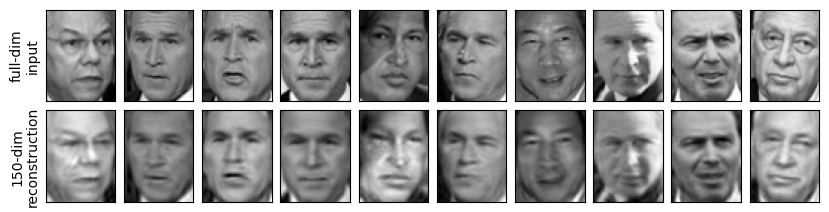

In [147]:
##------------------------------------------------------------------------------
print('\n*** c) Visualize data: The reduced image is blurrier but still recognizable')
##------------------------------------------------------------------------------

#Create reduced data with only 150 components (columns)
data_faces_150 = pca_faces_150.transform(faces.data)
df_faces_150 = pd.DataFrame(data_faces_150) #Convert output matrix into dataframe

#Reconstruct (1348x2914) original data from (1348x150) reduced data  with approximtion
# the pca.inverse_transform(reduced_matrix) will take the reduced data to reconstruct original data
# original_data_approx = (reduced_data @ components_ (Vt.T = V)) + mean
data_faces_reconstruct = pca_faces_150.inverse_transform(data_faces_150)
df_faces_reconstruct = pd.DataFrame(data_faces_reconstruct)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize = (10, 2.5), 
                              subplot_kw  = {'xticks':[], 'yticks':[]},
                              gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i in range(10):
   ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap = 'binary_r')
   ax[1, i].imshow(data_faces_reconstruct[i].reshape(62, 47),  cmap='binary_r')
   ax[0, 0].set_ylabel('full-dim\ninput')
   ax[1, 0].set_ylabel('150-dim\nreconstruction')

#faces.data[i] ->>>> selects a specific face from the dataset
#.reshape(62, 47) ---> reshapes the 1D array into a 2D image with 62 rows and 47 columns
#imshow() ---> displays the image
#cmap='binary_r' ---> uses a reversed binary colormap (typically black and white)
#ax[0, i] ---> places the image in a specific subplot position in a matplotlib grid